In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [240]:
df = pd.read_csv('https://tinyurl.com/alugueis-sp-df')

In [241]:
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [242]:
df["Negotiation Type"].unique()

array(['rent', 'sale'], dtype=object)

In [243]:
salesDf = df[df["Negotiation Type"] == "sale"]

In [244]:
salesDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552590,-46.691104
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [245]:
bairroDf = df['District'].str.split('/', expand=True)

In [246]:
salesDf["Negotiation Type"].unique()

array(['sale'], dtype=object)

In [247]:
salesDf["Property Type"].unique()

array(['apartment'], dtype=object)

In [248]:
salesDf.drop(columns=["Negotiation Type","Property Type"],inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_23212\3596614005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesDf.drop(columns=["Negotiation Type","Property Type"],inplace=True)


In [249]:
salesDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,1,1,1,0,Vila Madalena/São Paulo,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,-23.547687,-46.692594
4904,1680000,1580,155,3,5,3,2,1,0,1,0,Vila Madalena/São Paulo,-23.552590,-46.691104
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,-23.553087,-46.697890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,-23.652060,-46.637046


In [250]:
salesDf.drop(columns=["District"],inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_23212\2451100808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesDf.drop(columns=["District"],inplace=True)


In [251]:
finalDf = pd.concat([salesDf,bairroDf],axis=1,join="inner")

In [252]:
finalDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,0,1
4901,732600,1000,74,1,2,1,2,1,0,1,0,-23.552129,-46.692244,Vila Madalena,São Paulo
4902,1990000,2400,164,4,5,2,3,1,1,1,0,-23.551613,-46.699106,Vila Madalena,São Paulo
4903,720000,700,70,2,2,1,1,1,0,1,1,-23.547687,-46.692594,Vila Madalena,São Paulo
4904,1680000,1580,155,3,5,3,2,1,0,1,0,-23.552590,-46.691104,Vila Madalena,São Paulo
4905,1200000,900,56,2,2,1,2,0,1,1,0,-23.553087,-46.697890,Vila Madalena,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,-23.653004,-46.635463,Jabaquara,São Paulo
13636,545000,630,74,3,2,1,2,0,0,1,0,-23.648930,-46.641982,Jabaquara,São Paulo
13637,515000,1100,114,3,3,1,1,0,0,1,0,-23.649693,-46.649783,Jabaquara,São Paulo
13638,345000,48,39,1,2,1,1,0,1,1,0,-23.652060,-46.637046,Jabaquara,São Paulo


In [253]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6412 entries, 4901 to 13639
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          6412 non-null   int64  
 1   Condo          6412 non-null   int64  
 2   Size           6412 non-null   int64  
 3   Rooms          6412 non-null   int64  
 4   Toilets        6412 non-null   int64  
 5   Suites         6412 non-null   int64  
 6   Parking        6412 non-null   int64  
 7   Elevator       6412 non-null   int64  
 8   Furnished      6412 non-null   int64  
 9   Swimming Pool  6412 non-null   int64  
 10  New            6412 non-null   int64  
 11  Latitude       6412 non-null   float64
 12  Longitude      6412 non-null   float64
 13  0              6412 non-null   object 
 14  1              6412 non-null   object 
dtypes: float64(2), int64(11), object(2)
memory usage: 801.5+ KB


In [254]:
finalDf.rename(columns={0: 'Bairro',1: 'CEDADE'},inplace=True)

In [255]:
finalDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Bairro,CEDADE
4901,732600,1000,74,1,2,1,2,1,0,1,0,-23.552129,-46.692244,Vila Madalena,São Paulo
4902,1990000,2400,164,4,5,2,3,1,1,1,0,-23.551613,-46.699106,Vila Madalena,São Paulo
4903,720000,700,70,2,2,1,1,1,0,1,1,-23.547687,-46.692594,Vila Madalena,São Paulo
4904,1680000,1580,155,3,5,3,2,1,0,1,0,-23.552590,-46.691104,Vila Madalena,São Paulo
4905,1200000,900,56,2,2,1,2,0,1,1,0,-23.553087,-46.697890,Vila Madalena,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,-23.653004,-46.635463,Jabaquara,São Paulo
13636,545000,630,74,3,2,1,2,0,0,1,0,-23.648930,-46.641982,Jabaquara,São Paulo
13637,515000,1100,114,3,3,1,1,0,0,1,0,-23.649693,-46.649783,Jabaquara,São Paulo
13638,345000,48,39,1,2,1,1,0,1,1,0,-23.652060,-46.637046,Jabaquara,São Paulo


In [256]:
finalDf["CEDADE"].unique()

array(['São Paulo'], dtype=object)

In [257]:
finalDf.drop(columns=["CEDADE"],inplace=True)

In [258]:
finalDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Bairro
4901,732600,1000,74,1,2,1,2,1,0,1,0,-23.552129,-46.692244,Vila Madalena
4902,1990000,2400,164,4,5,2,3,1,1,1,0,-23.551613,-46.699106,Vila Madalena
4903,720000,700,70,2,2,1,1,1,0,1,1,-23.547687,-46.692594,Vila Madalena
4904,1680000,1580,155,3,5,3,2,1,0,1,0,-23.552590,-46.691104,Vila Madalena
4905,1200000,900,56,2,2,1,2,0,1,1,0,-23.553087,-46.697890,Vila Madalena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,-23.653004,-46.635463,Jabaquara
13636,545000,630,74,3,2,1,2,0,0,1,0,-23.648930,-46.641982,Jabaquara
13637,515000,1100,114,3,3,1,1,0,0,1,0,-23.649693,-46.649783,Jabaquara
13638,345000,48,39,1,2,1,1,0,1,1,0,-23.652060,-46.637046,Jabaquara


In [259]:
finalDf["Bairro"].unique()

array(['Vila Madalena', 'Mooca', 'Brooklin', 'Vila Olimpia',
       'Barra Funda', 'Bela Vista', 'Bom Retiro', 'Brás', 'Consolação',
       'Liberdade', 'Pari', 'República', 'Santa Cecília', 'Sé',
       'Casa Verde', 'Jaçanã', 'Mandaqui', 'Santana', 'Tremembé',
       'Tucuruvi', 'Vila Guilherme', 'Vila Maria', 'Medeiros',
       'Água Rasa', 'Aricanduva', 'Artur Alvim', 'Belém', 'Cangaíba',
       'Carrão', 'Cidade Líder', 'Cidade Tiradentes',
       'Ermelino Matarazzo', 'Guaianazes', 'Iguatemi', 'Itaim Paulista',
       'Itaquera', 'Jardim Helena', 'José Bonifácio', 'Lajeado',
       'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba', 'São Lucas',
       'São Mateus', 'São Miguel', 'São Rafael', 'Tatuapé', 'Vila Curuçá',
       'Vila Formosa', 'Vila Jacuí', 'Vila Matilde', 'Vila Prudente',
       'Cambuci', 'Campo Belo', 'Campo Grande', 'Campo Limpo',
       'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra', 'Cursino',
       'Grajaú', 'Ipiranga', 'Itaim Bibi', 'Jabaquara', 'Jard

In [260]:
bairroDummies = pd.get_dummies(finalDf["Bairro"])

In [261]:
bairroDummies

,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,Brasilândia,Brooklin,...,Vila Jacuí,Vila Leopoldina,Vila Madalena,Vila Maria,Vila Mariana,Vila Matilde,Vila Olimpia,Vila Prudente,Vila Sônia,Água Rasa
4901,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4902,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4903,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4904,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4905,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
finalDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Bairro
4901,732600,1000,74,1,2,1,2,1,0,1,0,-23.552129,-46.692244,Vila Madalena
4902,1990000,2400,164,4,5,2,3,1,1,1,0,-23.551613,-46.699106,Vila Madalena
4903,720000,700,70,2,2,1,1,1,0,1,1,-23.547687,-46.692594,Vila Madalena
4904,1680000,1580,155,3,5,3,2,1,0,1,0,-23.552590,-46.691104,Vila Madalena
4905,1200000,900,56,2,2,1,2,0,1,1,0,-23.553087,-46.697890,Vila Madalena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,-23.653004,-46.635463,Jabaquara
13636,545000,630,74,3,2,1,2,0,0,1,0,-23.648930,-46.641982,Jabaquara
13637,515000,1100,114,3,3,1,1,0,0,1,0,-23.649693,-46.649783,Jabaquara
13638,345000,48,39,1,2,1,1,0,1,1,0,-23.652060,-46.637046,Jabaquara


In [263]:
bairroLessDf = finalDf.drop(columns=["Bairro"])

In [264]:
bairroLessDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
4901,732600,1000,74,1,2,1,2,1,0,1,0,-23.552129,-46.692244
4902,1990000,2400,164,4,5,2,3,1,1,1,0,-23.551613,-46.699106
4903,720000,700,70,2,2,1,1,1,0,1,1,-23.547687,-46.692594
4904,1680000,1580,155,3,5,3,2,1,0,1,0,-23.552590,-46.691104
4905,1200000,900,56,2,2,1,2,0,1,1,0,-23.553087,-46.697890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,-23.652060,-46.637046


In [265]:
originalDf = finalDf

In [266]:
completeDf = pd.concat([bairroLessDf,bairroDummies],axis=1)

In [267]:
completeDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí,Vila Leopoldina,Vila Madalena,Vila Maria,Vila Mariana,Vila Matilde,Vila Olimpia,Vila Prudente,Vila Sônia,Água Rasa
4901,732600,1000,74,1,2,1,2,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4902,1990000,2400,164,4,5,2,3,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4903,720000,700,70,2,2,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4904,1680000,1580,155,3,5,3,2,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4905,1200000,900,56,2,2,1,2,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13636,545000,630,74,3,2,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13637,515000,1100,114,3,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13638,345000,48,39,1,2,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [268]:
finalDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Bairro
4901,732600,1000,74,1,2,1,2,1,0,1,0,-23.552129,-46.692244,Vila Madalena
4902,1990000,2400,164,4,5,2,3,1,1,1,0,-23.551613,-46.699106,Vila Madalena
4903,720000,700,70,2,2,1,1,1,0,1,1,-23.547687,-46.692594,Vila Madalena
4904,1680000,1580,155,3,5,3,2,1,0,1,0,-23.552590,-46.691104,Vila Madalena
4905,1200000,900,56,2,2,1,2,0,1,1,0,-23.553087,-46.697890,Vila Madalena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,-23.653004,-46.635463,Jabaquara
13636,545000,630,74,3,2,1,2,0,0,1,0,-23.648930,-46.641982,Jabaquara
13637,515000,1100,114,3,3,1,1,0,0,1,0,-23.649693,-46.649783,Jabaquara
13638,345000,48,39,1,2,1,1,0,1,1,0,-23.652060,-46.637046,Jabaquara


In [269]:
originalDf

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,Bairro
4901,732600,1000,74,1,2,1,2,1,0,1,0,-23.552129,-46.692244,Vila Madalena
4902,1990000,2400,164,4,5,2,3,1,1,1,0,-23.551613,-46.699106,Vila Madalena
4903,720000,700,70,2,2,1,1,1,0,1,1,-23.547687,-46.692594,Vila Madalena
4904,1680000,1580,155,3,5,3,2,1,0,1,0,-23.552590,-46.691104,Vila Madalena
4905,1200000,900,56,2,2,1,2,0,1,1,0,-23.553087,-46.697890,Vila Madalena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,-23.653004,-46.635463,Jabaquara
13636,545000,630,74,3,2,1,2,0,0,1,0,-23.648930,-46.641982,Jabaquara
13637,515000,1100,114,3,3,1,1,0,0,1,0,-23.649693,-46.649783,Jabaquara
13638,345000,48,39,1,2,1,1,0,1,1,0,-23.652060,-46.637046,Jabaquara


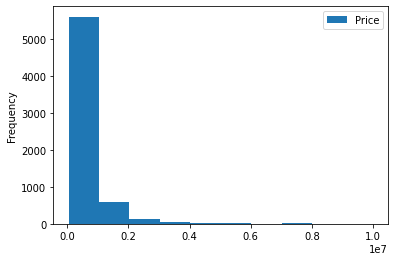

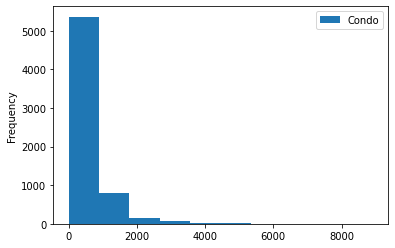

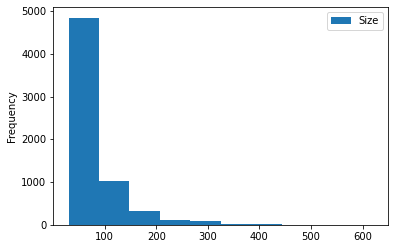

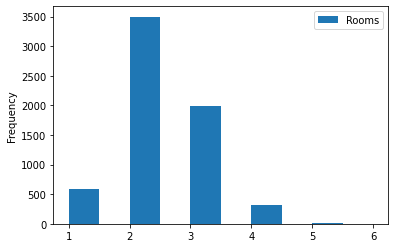

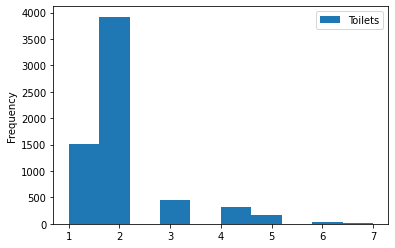

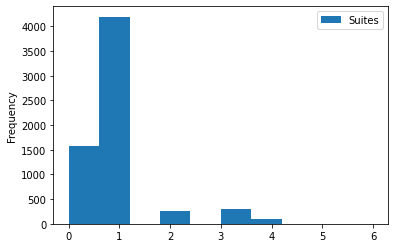

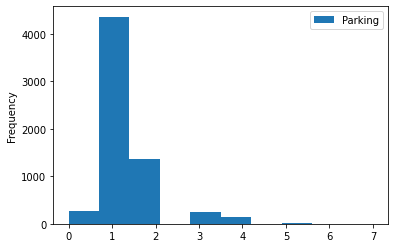

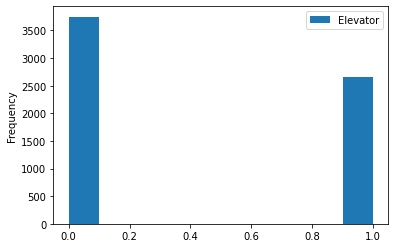

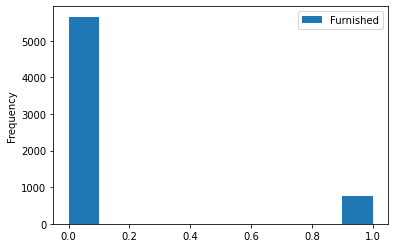

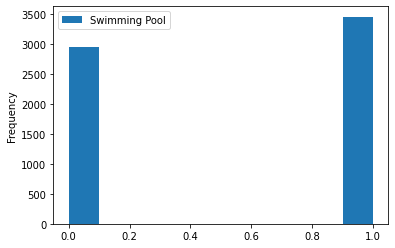

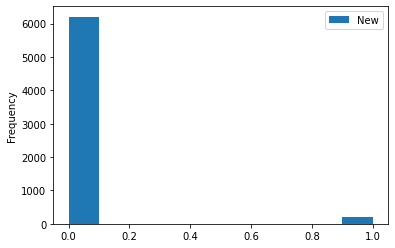

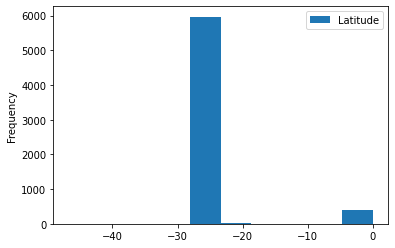

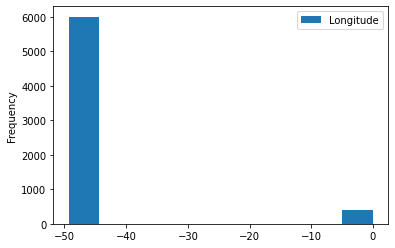

In [326]:
for i in bairroLessDf.columns:
    bairroLessDf[i].plot.hist( legend=True )
    plt.show()

In [327]:
x = bairroLessDf.drop(columns=["Price"])
y = bairroLessDf["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=22)

In [347]:
y_train

11629    1000000
13343     285000
11953     339000
8943     1400000
6333      174000
          ...   
12706     300000
5544      930000
12136    2300000
13504     309000
8121      550000
Name: Price, Length: 5129, dtype: int64

In [341]:
minmax = MinMaxScaler()

x_train_scaled = minmax.fit_transform(x_train)

x_test_scaled = minmax.transform(x_test)

x_train_scaled
x_test_scaled

array([[0.04147982, 0.04067797, 0.2       , ..., 0.        , 0.49718083,
        0.05387033],
       [0.04932735, 0.05084746, 0.4       , ..., 0.        , 0.49488233,
        0.05716405],
       [0.44843049, 0.34237288, 0.6       , ..., 0.        , 0.49580452,
        0.05419963],
       ...,
       [0.2544843 , 0.1440678 , 0.4       , ..., 0.        , 0.49478298,
        0.05428746],
       [0.02970852, 0.04915254, 0.4       , ..., 0.        , 0.49494645,
        0.05813367],
       [0.0896861 , 0.11016949, 0.6       , ..., 0.        , 0.49501694,
        0.05283229]])

In [329]:
def adjusted_r2(y_test, y_pred,X_train):

    from sklearn.metrics import r2_score



    adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) /
    (len(y_test) - X_train.shape[1] - 1))

    return adj_r2


In [330]:
def metrics_builder(y_test,y_pred):
    # import numpy as np

    # RAjusted = adjusted_r2(y_test,y_pred,x_train)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    # RMSE = metrics.mean_squared_error(y_test,y_pred,squared=False)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    # MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # RMSLE = metrics.mean_squared_log_error(y_test,y_pred)

    # print("RAjusted: ",RAjusted)
    print("MSE: ",MSE)
    # print("RMSE: ",RMSE)
    print("MAE: ",MAE)
    # print("MAPE: ",MAPE)
    # print("RMSLE: ",RMSLE)

In [333]:
def mine_knn(x_train, x_test, y_train, y_test, k=0):

    if k == 0:
        k = int( (len(y_train) + len(y_test)) ** 0.5 )


    knn = KNeighborsRegressor(n_neighbors=k)

    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    print("k:",k)

    metrics_builder(y_test,y_pred)


In [334]:
mine_knn(x_train_scaled, x_test_scaled, y_train, y_test)

k: 80
MSE:  287205569072.89606
MAE:  219634.98271628993


In [335]:
for i in range(0,20,1):
    mine_knn(x_train_scaled, x_test_scaled, y_train, y_test,k=i)

k: 80
MSE:  287205569072.89606
MAE:  219634.98271628993
k: 1
MSE:  216971297695.93686
MAE:  203264.06313328136
k: 2
MSE:  186968556113.9657
MAE:  187821.37022603274
k: 3
MSE:  174040912014.4201
MAE:  181080.1156144453
k: 4
MSE:  159942988291.5818
MAE:  172554.72310989868
k: 5
MSE:  160786906499.42807
MAE:  172079.54325798908
k: 6
MSE:  164579004178.46628
MAE:  171770.18511301637
k: 7
MSE:  158582607033.1082
MAE:  171349.13016367887
k: 8
MSE:  153787588681.80408
MAE:  170033.1043452845
k: 9
MSE:  158728696226.14087
MAE:  171258.40045033343
k: 10
MSE:  163109243774.26993
MAE:  172867.4539360873
k: 11
MSE:  164888305096.6575
MAE:  174389.8302274499
k: 12
MSE:  169346024487.2632
MAE:  175013.4293322941
k: 13
MSE:  170335085451.88422
MAE:  176490.88284669345
k: 14
MSE:  171119747159.0112
MAE:  176629.06591693574
k: 15
MSE:  174870673623.12595
MAE:  178634.66287347363
k: 16
MSE:  178834685597.4875
MAE:  180491.8079696025
k: 17
MSE:  183437841197.24704
MAE:  182410.57154646737
k: 18
MSE:  188

In [336]:
def call_floresta(x_train, x_test, y_train, y_test,estimators, depth, impurity):
    #floresta = RandomForestRegressor(n_estimators=estimators,max_depth=depth,min_impurity_decrease=impurity,random_state=22)
    floresta = RandomForestRegressor(n_estimators=estimators,random_state=22)
    floresta.fit(x_train,y_train)

    y_pred = floresta.predict(x_test)

    print(f"Estim -> {estimators} = Depth: {depth}, Impurity: {impurity}")


    metrics_builder(y_test,y_pred)

In [337]:
for i in range(1,21,2):
    call_floresta(x_train_scaled, x_test_scaled, y_train, y_test,estimators = i, depth = 5, impurity = 0.0001)

Estim -> 1 = Depth: 5, Impurity: 0.0001
MSE:  125165640666.65025
MAE:  162397.3702732705
Estim -> 3 = Depth: 5, Impurity: 0.0001
MSE:  76268450871.27432
MAE:  126839.92362439675
Estim -> 5 = Depth: 5, Impurity: 0.0001
MSE:  64806705223.40568
MAE:  115467.23119866972
Estim -> 7 = Depth: 5, Impurity: 0.0001
MSE:  62383987145.320244
MAE:  110315.49055054795
Estim -> 9 = Depth: 5, Impurity: 0.0001
MSE:  61496244735.45719
MAE:  108793.64073808999
Estim -> 11 = Depth: 5, Impurity: 0.0001
MSE:  59733039173.59385
MAE:  107263.43857230774
Estim -> 13 = Depth: 5, Impurity: 0.0001
MSE:  58267054652.05986
MAE:  106405.96422359043
Estim -> 15 = Depth: 5, Impurity: 0.0001
MSE:  57866377949.43025
MAE:  106055.13377292117
Estim -> 17 = Depth: 5, Impurity: 0.0001
MSE:  57666913086.9522
MAE:  105567.22517829371
Estim -> 19 = Depth: 5, Impurity: 0.0001
MSE:  56227246806.39926
MAE:  104285.53274064661


In [338]:
def call_mlp(x_train, x_test, y_train, y_test, l_s, epochs=100):
    mlp = MLPRegressor(hidden_layer_sizes=l_s,max_iter=epochs,random_state=22)
    mlp.fit(x_train,y_train)

    y_pred = mlp.predict(x_test)

    print("Hidden layers:",l_s)
    print("Epochs",epochs)

    metrics_builder(y_test,y_pred)

In [350]:
call_mlp(x_train,x_test,y_train,y_test,(12,5),200000000000000000000000000000000)

Hidden layers: (12, 5)
Epochs 200000000000000000000000000000000
MSE:  126200078785.88728
MAE:  175968.5790706537


C:\Users\mathe\PycharmProjects\120121\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Hidden layers: (3, 3)
Epochs 400
MSE:  281798410140.3835
MAE:  256292.6949220419


C:\Users\mathe\PycharmProjects\120121\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
281798410140
128786211997